<a href="https://colab.research.google.com/github/yeonji200522-oss/Hands-on-Machine-Learning/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**2장 머신러닝 프로젝트 처음부터 끝까지**
부동산 데이터 프로젝트를 가정.  
단계 설명  
1. 큰 그림 확인  
2. 데이터 수집  
3. 인사이트를 위해 탐색하고 시각화  
4. 머신러닝 알고리즘을 위해 데이터 준비  
5. 모델 선택, 훈련  
6. 파인 튜닝  
7. 솔루션 제시  
8. 시스템 론칭, 모니터링, 유지 보수

###**2.1 실제 데이터로 작업하기**
공개 데이터 저장소  
openML, kaggle, PapersWithCode,UC 어바인 머신러닝 저장소, 아마존 AWS 데이터셋, 텐서플롯 데이터셋  
메타 포털  
데이터 포털, 오픈 데이터 모니터  
기타  
위키백과 머신러닝 데이터셋 목록, Quora, 데이터셋 서브레딧  

###**2.2 큰그림보기**
####**2.2.1 문제 정의**
+ 파이프라인: 데이터 처리 component들이 연속되어 있는 것.  

비즈니스의 목적은 무엇인가? -> 현재 솔루션은 어떻게 구성되어 있는가?  
각 구역은 레이블된 훈련샘플을 가질 때 기대 출력값은 궁역의 중간 주택 가격을 설명. (지도 학습 문제)  
에측 대상이 연속적인 값일 때 회귀 문제.  
사용되는 특성이 여러 개 => 다변량 회귀  

####**2.2.2 성능 측정 지표 선택**
회귀 문제에서 모델의 예측값과 실제값 사이의 오차를 측정하는 지표인 RMSE를 대표적으로 사용  
**RMSE(평균제곱근오차)**  
- 회귀문제에서 가장 대표적으로 사용  
- 오차가 커질 수록 값이 더욱 증가  
- 이상치에 민감하다는 단점  
$$
\text{RMSE} = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)})-y^{(i})^2}
$$  

**MAE (평균 절대 편차)**
- 예측 오차의 절댓값 평균  
- RMSE보다 이상치에 덜 민감  
$$
\text{MAE} = \frac{1}{m} \sum_{i=1}^{m} |h(x^{(i)})-y^{(i)}|
$$

**노름(norm)**  
RMSE, MAE모두 예측값과 타깃값 사이의 거리를 재는 방법  
RMSE는 유클리드 노름, 절댓값의 합을 계산하는 것은 맨해튼 노름  
노름의 지수가 클수록 큰 값의 원소에 치우쳐져 작은 값은 무시.  

####**2.2.3 가정 검사**



###**2.3 데이터 가져오기**
####**2.3.5 데이터 다운로드**


In [1]:
import warnings
import logging
import matplotlib

#  UserWarning 전부 무시
warnings.filterwarnings("ignore", category=UserWarning)

#  matplotlib 내부 WARNING 로그 차단
logging.getLogger("matplotlib").setLevel(logging.ERROR)
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)

#  IPython matplotlib 출력 단계 경고 차단
matplotlib.set_loglevel("error")


In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():   #load_housing_data()함수를 통해 datasets/housing.tgz 파일 찾기
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():   #datasets/housing.tgz 파일을 찾지 못하면 dataset 디렉터리 생성
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz" #깃허브 저장소에서 housing.tgz 파일 다운로드
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv")) #이 파일 안의 데이터를 판다스 데이터프레임으로 로드해 객체 반환

housing = load_housing_data()

/tmp/ipython-input-147635879.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


####**2.3.6 데이터 구조 훑어보기**

아래 표를 참고  
+ 특성은 longitude, latitude, 등 10개  
+ .head()함수는 처음 다섯 행을 확인  
+ .info()함수는 데이터에 관한 간략한 설명  
전체 행 수, 각 특성의 타입과 널이 아닌 값의 개수를 확인

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


ocean_proximity는 csv파일에서 가져왔기에 텍스트 특성일것, 나머지는 숫자형.  
  
+ value_count(): 어떤 카테고리와 각 카테고리마다 얼마나 많은 구역이 있는지 확인  
+ describe(): 숫자형 특성의 요약 정보를 확인

In [5]:
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


숫자형 데이터의 형태를 빠르게 검토하기 위해서는 히스토그램으로 그려보는 것도 좋음.   
+ hist(): 히스토그램 그리기

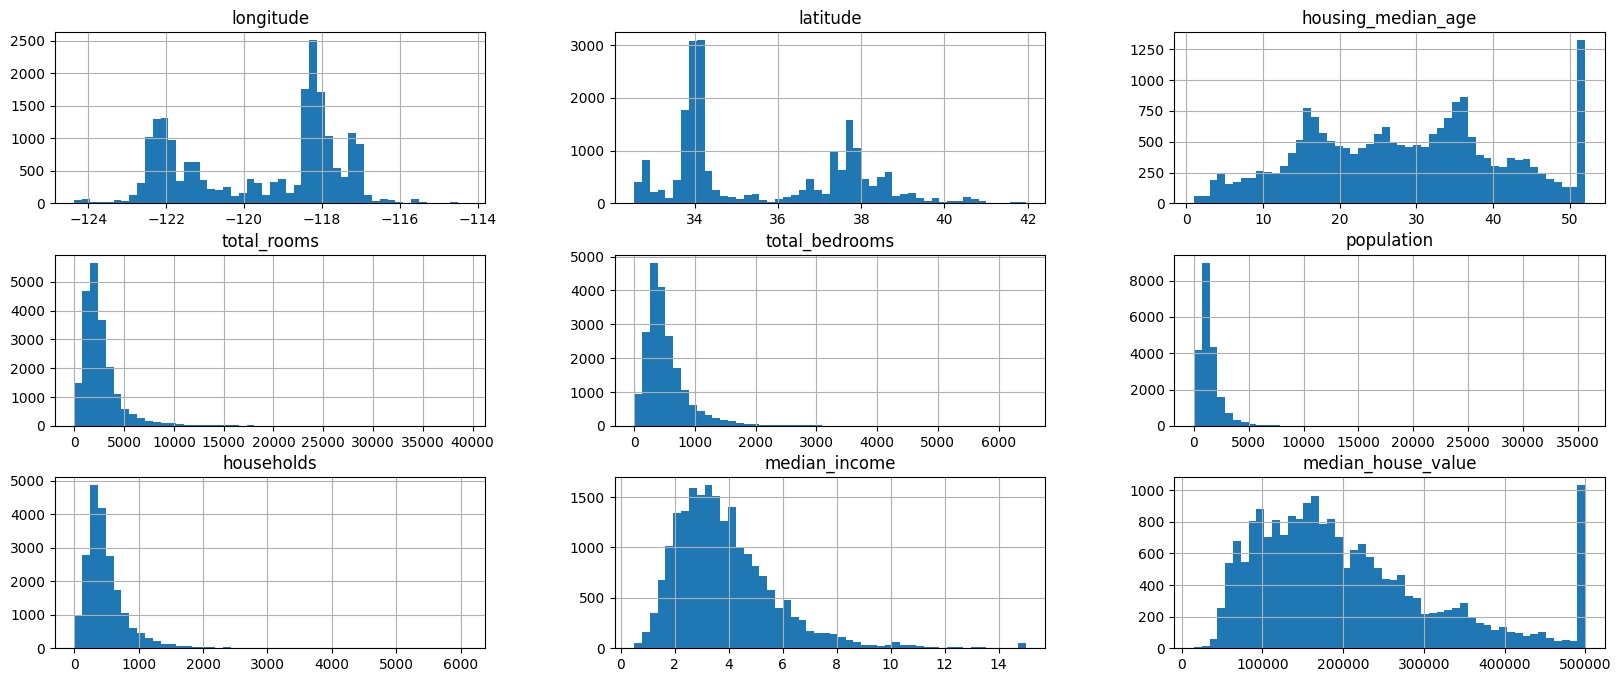

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,8))
plt.show()

<히스토그램 해석하기>  
1. 중간 주택 연도와 중간 주택 가격은 최댓값과 최솟값을 한정. 그러나 머신러닝이 한곗값을 넘어가지 않도록 학습하는 문제가 발생 할 가능성. 이 경우 아래 두 가지 경우를 고려  
- 한곗값 밖의 구역에 대한 정확한 레이블 구하기  
- 훈련 세트에서 이런 구역 제거  
2. 특성 스케일링 (나중에 공부하기)  
3. 대부분의 히스토그램에서 긴 오른쪽 꼬리 발견. 이 경우 머신러닝 알고리즘에서 패턴을 찾기 어려워 할 가능성 존재.

####**2.3.7 테스트 세트 만들기**  
+ 데이터 스누핑 편향: 데이터를 과도하게 탐색해 겉으로 보이는 실제로는 없는 패턴에 속아 잘못된 결론에 도달하게 되는 문제. 과적합의 원인이 되기도 함.   
  
<테스트 세트 만들기>  
샘플에서 랜덤으로 선택해 데이터셋의 20% 정도를 떼어놓기

In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [10]:
len(test_set)

4128

하지만 위의 경우에는 다시 실행할 경우 다른 테스트 세트가 생성되기에 모든 데이터셋을 보는 셈. 이를 피하기 위해서는  
+ 처음 실행에서 테스트 세트를 저장 후 다음 실행에서 불러오기  
+ 항상 같은 난수 인덱스가 생성되도록 np.random.permutation() 호출 전 난수 발생기의 초깃값 지정 (예시, np.random.seed(42))  
  
다음번에 업데이트된 데이터셋을 사용할 때 문제 발생에서 안정적인 훈련/테스트 분할을 가능하게 하는 일반적인 해결책은 샘플의 식별자를 사용해 테스트 세트로 보낼지 말지 결정하는 것.

In [11]:
#반복 실행하며 데이터셋이 갱신되더라도 동일한 테스트 셋 유지하기
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier))<test_ratio*2*32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set=ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

식별자 컬럼이 없는 경우 행의 인덱스를 ID로 사용

In [12]:
housing_with_id=housing.reset_index()

train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

행의 고유 식별자로 사용할 때 새 데이터는 데이터셋의 끝에 추가되며 삭제되지 않아야함.

In [13]:
housing_with_id["id"]=housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set=split_data_with_id_hash(housing_with_id, 0.2, "id")


데이터셋을 서브셋으로 나누는 다양한 방법 제공하는 **사이킷런**  
**train_test_split !!!**  
1. 난수 초깃값을 지정하는 random_state
2. 행의 개수가 같은 여러개의 데이터셋을 넘겨 동일한 인덱스 기반으로 나누기

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set= train_test_split(housing, test_size=0.2, random_state=42)

데이터셋이 적을 때는 편향이 생길 가능성 존재.  
+ 계측적 샘플링  
계층이라는 동질의 그룹으로 나눔  
전체를 대표하도록 각 계층에서 샘플 추출해 테스트 세트 생성  
이 과정에서 계층별로 데이터셋에 충분한 샘플 수 필요. (편향을 피하기 위해)  
  
pd.cut()함수를 통해 카테고리 특성 만들기

In [15]:
#계층적 샘플링 수행 전
housing["income_cat"]=pd.cut(housing["median_income"], bins=[0,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

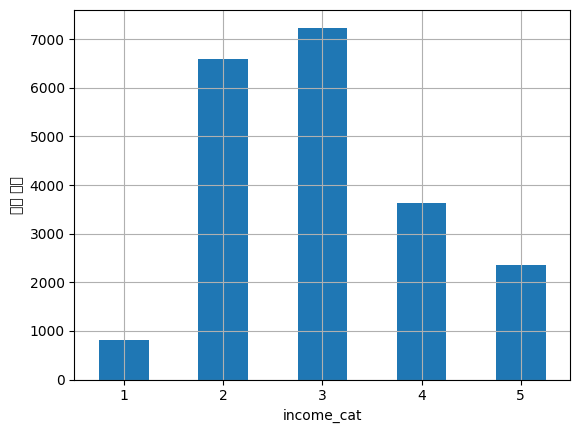

In [16]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("income_cat")
plt.ylabel("구역 개수")
plt.show()

사이킷런 sklearn.model_selection 패키지 안의 분할기 클래스를 사용해 훈련/테스트로 분할  
(모든 분할기는 반복자를 반환하는 split() 포함)  
split(): 데이터 자체가 아닌 인덱스 반환  

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
strat_splits=[]
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]
  strat_splits.append((strat_train_set, strat_test_set))

In [18]:
#첫번째분할
strat_train_set, strat_test_set=strat_splits[0]

In [19]:
#하나의 분할이 필요한 경우 => train_test_split()과 stratify를 사용
strat_train_set, strat_test_set=train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])


아래는 10개로 계층을 분할이 잘 됐는지 확인하는 내용

In [20]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


###**2.4 데이터 이해를 위한 탐색과 시각화**
+ 2.4.1 지리적 데이터 시각화  
: alpha를 통해 밀집도 확인, 다양한 매개변수 추가
+ 2.4.2 상관관계 조사  
+ 2.4.3 특성 조합으로 실험하기  
  


In [21]:
#먼저 데이터 복사본 생성
housing=strat_train_set.copy()

####**2.4.1 지리적 데이터 시각화하기**  

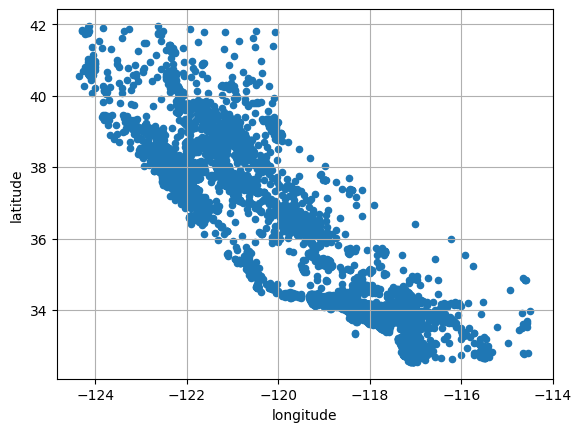

In [22]:
#지리정보(위경도) 산점도로 나타내기
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

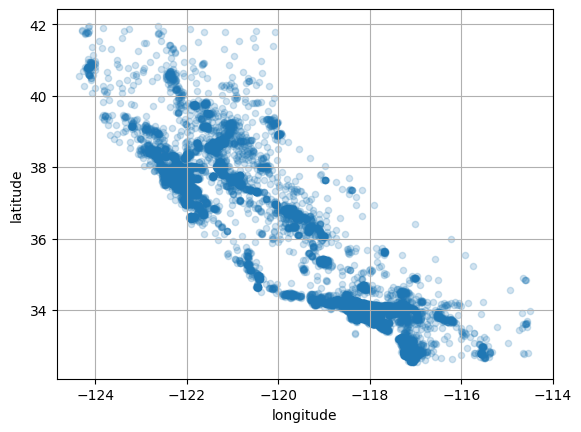

In [23]:
#alpha=0.2를 통해 데이터가 밀집된 영역 더 잘 보기
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

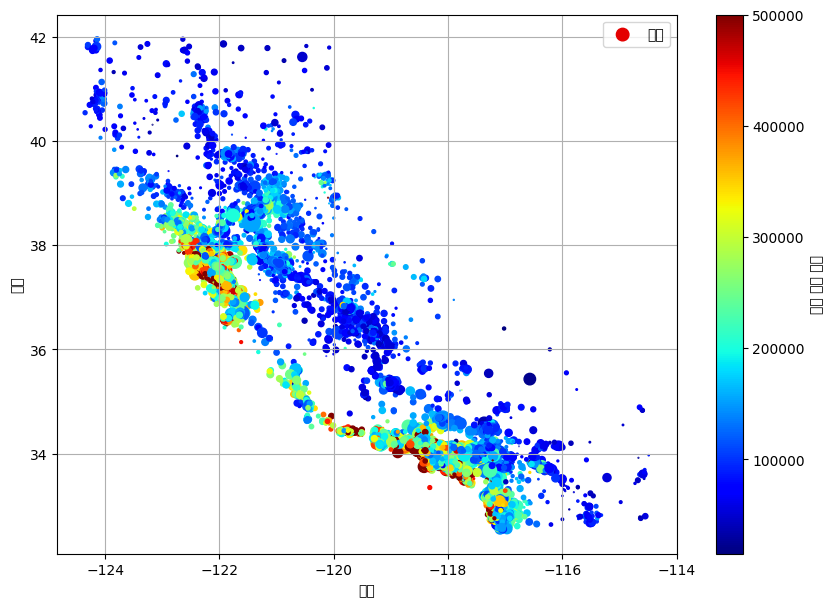

In [24]:
#다양한 매개변수 추가
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, label="인구",  #s: 원의 반지름 = 구역의 인구
             c="median_house_value", cmap="jet", colorbar=True, #c: 색상 = 가격, cmap: 파랑(낮음)~빨강(높음) jet을 통해
             legend=True, figsize=(10,7))
cax=plt.gcf().get_axes()[1]
cax.set_ylabel("중간 주택 가격")
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

####**2.4.2 상관관계 조사하기**

+ 모든 특성 간의 표준 상관계수는 corr()를 이용해 계산

In [25]:
corr_matrix=housing.corr(numeric_only=True)

In [26]:
#상관관계 크기 확인
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


상관관계 (-1~1)  
+ 1에 가까운 상관관계  
ex) 중간 주택 가격은 중간 소득이 오를 때 증가하는 경향  
+ -1에 가까운 상관관계  
ex) 위도와 중간 주택 가격 사이에는 약한 음의 상관관계 => 북쪽일 수록 주택 가격 하락하는 경향  
+ 0에 가까운 상관관계 - 선형 상관관계가 없음


+ scatter_matrix()  
특성 사이의 상관관계 확인

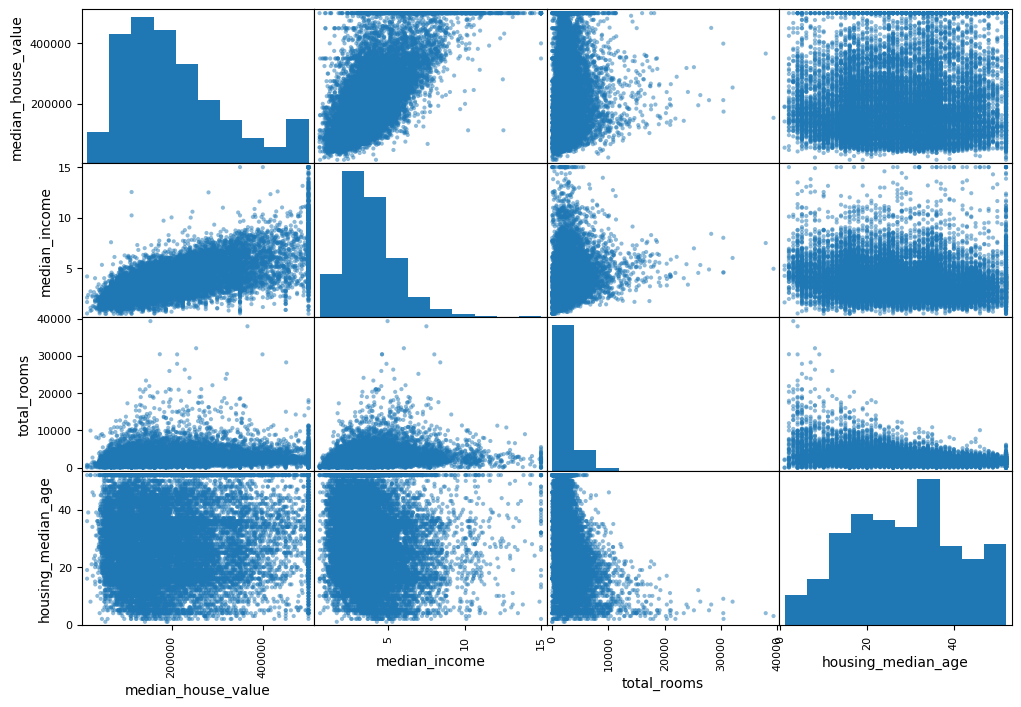

In [27]:
from pandas.plotting import scatter_matrix

attributes=["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

대각선의 표는 유용하지 않으므로 히스토그램으로 변경  
아래는 중간 주택 가격-중간 소득 을 더 확인

In [28]:
import warnings
import logging

# UserWarning 없애기
warnings.filterwarnings("ignore", category=UserWarning)

#matplotlib font 관련 없애기
logging.getLogger("matplotlib.font_manager").setLevel(logging.ERROR)
logging.getLogger("matplotlib").setLevel(logging.ERROR)


In [29]:
import warnings

warnings.filterwarnings("ignore", message="findfont: Font family")
warnings.filterwarnings("ignore", message="Glyph .* missing from font")


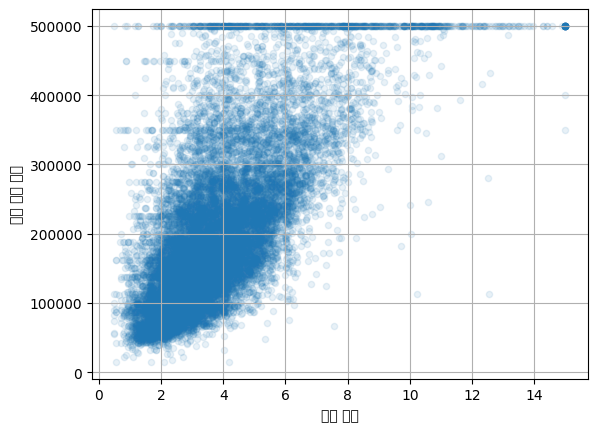

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.xlabel("중간 소득")
plt.ylabel("중간 주택 가격")
plt.show()

1. 매우 강한 상관관계 확인  
위로 향하는 상관관계로 많이 퍼져있지 않음
2. 한계값 확인  
한계값이 보이는 직선을 학습하지 않도록 해당 구역 삭제

####**2.4.3 특성 조합으로 실험하기**
데이터 정제나 상관관계 확인을 위한 데이터 변형 등

In [31]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [32]:
#상관관계 확인
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_household,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
population_per_household,-0.038224
longitude,-0.050859


--> 표 확인  
bedrooms_ratio 특성은 전체 방 개수, 침실 개수보다 중간 주택 가격에서 높은 상관관계  
침실/방 비율이 낮은 집은 더 비싼 경향 확인  
  
  => 정확한 결과를 낸다는 것보다는 인사이트를 얻고 탐색 단계로 돌아오는 것을 추천...

###**2.5 머신러닝 알고리즘을 위한 데이터 준비**
+ 2.5.0 서론  
: 데이터 준비를 자동으로 해야하는 이유
1. 손쉬운 데이터 변환  
2. 향후 프로젝트에 재사용이 가능하도록 변환 라이브러리 구축  
3. 실제 시스템 알고리즘에 새 데이터 주입 전 사용 가능  
4. 어떤 조합이 좋은지 확인하는 데 편리  

+ 2.5.1 데이터 정제  
: 누락된 특성 처리하기

+ 2.5.2 텍스트와 범주형 특성 다루기  
: 텍스트에서 숫자로 변환, 원-핫 인코딩, 변환기 출력

+ 2.5.3 특성 스케일과 변환   
: 입력 특성 변환, 타깃값 변환
+ 2.5.4 사용자 정의 변환기  
: 사용자 정의 변환기 생성  
+ 2.5.5 변환 파이프라인  
: 순서 변환 클래스

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

####**2.5.1 데이터 정제**  
: 누락된 특성 처리하기  
+ 해당 구역 제거: dropna()
+ 전체 특성 삭제: drop()
+ 누락값 대체: fillna(), SimpleImputer, KNNImputer, IterativeImputer

SimpleImputer클래스  
: 사이킷런, 각 특성의 중간값을 저장하기 유용. 훈련/검증/테스트/새로운 데이터 세트의 누락된 값을 대체

자꾸 에러나니까 너네 좀 빠져보바ㅏㅏㅏㅏㅏ  

+ housing.dropna(subset=["total_bedrooms"], inplace=True) #해당구역제거

+ housing.drop("total_bedrooms", axis=1, inplace=True) #전체특성삭제

+ median=housing["total_bedrooms"].median() #누락값대체
housing["total_bedrooms"].fillna(median, inplace=True)

In [34]:
#사이킷런에 있는 SimpleImputer클래스 사용
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy="median")

In [35]:
#수치 특성만 가진 데이터에서만 중간값을 계산하기 위해 데이터 복사
housing_num=housing.select_dtypes(include=[np.number])

In [36]:
#imputer객체의 fit()으로 훈련 데이터에 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [38]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [39]:
#훈련 세트에서 누락된 값을 학습한 중간값으로 대체
X=imputer.transform(housing_num)

사이킷런 변환기는 판다스 데이터프레임이 입력되어도 넘파이 배열로 출력.  
imputer.transform(housing_num)의 출력이 넘파이기에 열과 인덱스 복원

In [40]:
housing_tr=pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

####**2.5.2 텍스트와 범주형 특성 다루기**
housing데이터셋에서 텍스트형인 ocean_proximity  
텍스트에서 숫자로 변환: OrdinalEncoder

In [41]:
#특성값 확인하기
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [42]:
#숫자로 변환
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [43]:
#범주형 특성이 포함된 리스트 확인
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

원-핫 인코딩: 한 특성만 1이고 나머지 특성은 0일 때  
+ 원-핫 벡터로 바꾸기 위한 **OneHotEncoder**클래스   

OneHotEncoder의 출력은 넘파이가 아닌 사이파이 희소행렬  
(희소행렬은 0이 많은 행렬을 효율적으로 표현)     
OneHotEncoder는 어떤 카테고리로 훈련되었는지 기억한다는 것이 장점

넘파이 배열로 바꾸기 위해서는
+ **toarray**사용  
+ **sparse_output=False**로 설정


In [44]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [45]:
#넘파이 배열로 변경: 1. torray()
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [46]:
#넘파이 배열로 변경: 2. sparse_output=False
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [47]:
#categoris_ 인스턴스 변수를 사용해 카테고리 리스트 확인
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

+ get_dummies()함수: 범주형 특성을 원-핫 표현으로 바꿔서 카테고리 마다 하나의 이진 특성 만들기

In [48]:
#get_dummies를 사용했을 때 결과
df_test=pd.DataFrame({"ocean_proximity": ["INLAND","NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [49]:
#cat_encoder를 df_test에 적용했을 때 출력 결과
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

=> get_dummies/cat_encoder  
+ get_dummies: 두 개의 카테고리만 보이기에 두 개 열 출력  
+ cat_encoder: 학습된 카테고리마다 하나의 열을 순서대로 출력   

 알 수 없는 카테고리를 담은 데이터 프레임을 get_dummies에 넣으면 문제 X
+ OneHotEncoder는 알 수 없는 카테고리를 감지하고 예외를 발생시키지만 ignore을 통해 알 수 없는 카테고리를 0으로 설정 가능

In [50]:
#get_dummies 결과
df_test_unknown=pd.DataFrame({"ocean_proximity": ["ISLAND", "NEAR OCEAN"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_ISLAND,ocean_proximity_NEAR OCEAN
0,True,False
1,False,True


In [51]:
#OneHotEncoder 결과
cat_encoder.handle_unknown="ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

데이터 프레임을 사용해 사이킷런 추정기를 훈련할 때 추정기는 열 이름을 feature_names_in_속성에 저장  
사이킷런은 이 추정기에 입력된 모든 데이터프레임이 동일한 열 이름을 갖는지 확인  
+ 변환기는 출력으로 데이터프레임을 만들 수 있도록 get_feature_names_out()메서드 제공

In [52]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [53]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [54]:
df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown), columns=cat_encoder.get_feature_names_out(),index=df_test_unknown.index)

####**2.5.3 특성 스케일과 변환**
+ 특성 스케일링  
: 데이터에 적용할 변환  
  
입력된 숫자 특성들의 스케일이 다르면 제대로 작동X  
이를 해결하기 위해 **min-max 스케일링**, **표준화**사용  

+ min-max 스케일링(정규화)  
각 특성에 대해서 0-1 범위에 들도록 값을 이동하고 스케일을 조정  
데이터에서 최솟값을 뺀 후 최댓값과 최솟값의 차이로 나누기  
MinMaxScaler변환기   
(feature_range 매개변수로 0-1이 아닌 다른 범위로 조정 가능)  

+ 표준화  
평균을 뺀 후 표준편차로 나누기  
특정 범위로 값을 제한하지 않으며 이상치에 영향을 덜 받음  
StandardScaler변환기

In [55]:
# min-max
from sklearn.preprocessing import MinMaxScaler

min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

In [56]:
#표준화
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)

특성 분포의 꼬리가 두꺼울 때는 min-max 스케일링과 표준화는 대부분의 값을 작은 범위로 압축 -> 스케일링 전 두꺼운 꼬리를 줄이도록 데이터를 변환하고 분포가 대략적으로 대칭이 되도록 만들기  
멱법칙 분포처럼 꼬리가 길고 두껍다면 로그값으로 변환/버킷타이징    

+ 버킷타이징  
: 분포를 거의 동일한 크기의 버킷으로 자르고 income_cat 특성을 만들었던 것과 비슷하게 특성값을 해당하는 버킷의 인덱스로 바꾸기  
: 거의 동일한 크기의 버킷을 사용하면 거의 균등 분포인 특성으로 만들기 (추가적인 스케일링 필요 X)  
: 버킷 개수로 나눠 0~1 사이 범위로 만들기  

+ 특성이 멀티 모달인 분포

1. 버킷타이징  
: 인덱스를 인코딩 해야함. => 회귀모델 특겅값이 여러 범주에 대해 다양한 규칙을 쉽게 학습할 수 있음.  
2. 특성 사이의 유사도를 나타내는 특성을 추가  
: 입력값과 고정 포인트 사이의 거리에만 의존하는 방사 기저 함수(RBF)를 사용. 입력값이 고정 포인트에서 멀어질수록 출력값이 지수적으로 감소하는 가우스 RBF. 하이퍼파라미터는 특정값에서 멀어짐에 따라 유사도 값이 얼마나 빠르게 감소하는 지를 결정.   
rbf_kernel() 사용

In [57]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

+ 타깃값 변환  

inverse_transform(): 사이킷런 변환기의 역변환을 수행하는 메서드  

<아래 예시 상황>  
StandaedScaler을 사용해 레이블 스케일링 -> 스케일링된 레이블로 가단한 선형회귀 모델 훈련해 새로운 데이터에서 예측 생성 -> 변환기의 inverse_transform()메서드를 사용해 원본 스케일로 되돌리기  
StandardScaler는 2D이므로 데이터프레임으로 변환

In [58]:
from sklearn.linear_model import LinearRegression
target_scaler=StandardScaler()
scaled_labels=target_scaler.fit_transform(housing_labels.to_frame())
model=LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5]
scaled_predictions=model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

TransformedTargetRegressor을 통해 더 간단하게 가능  
이 클래스의 객체를 생성해 회귀 모델과 레이블 변환기를 전달하고 스케일링되지 않은 원본 레이블을 사용해 훈련 세트로 훈련. 이런 경우 앞의 내용과 동일하게 실행.

In [59]:
from sklearn.compose import TransformedTargetRegressor

model=TransformedTargetRegressor(LinearRegression(),
                                 transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions=model.predict(some_new_data)

####**2.5.4 사용자 정의 변환기**
사이킷런에서 제공하지 않는 작업을 위한 변환기 작성  
1. 사이킷런에서 제공하지 않는 작업을 위한 변환기 작성  
예시) 로그 변환기를 만들어 population특성에 적용  
"inverse_func=np.exp"은 선택사항.

In [60]:
from sklearn.preprocessing import FunctionTransformer

log_transformer=FunctionTransformer(np.log, inverse_func=np.exp)
log_pop=log_transformer.transform(housing[["population"]])

  
2. 추가적인 인수로 하이퍼파라미터 받기 (ex, 가우스RBF 유사도 계산 변환기)  
: 예시)  
rbf는 고정 포인트에서 일정 거리만큼 떨어진 값이 항상 2개 이기에 역함수가 없음.  
특성을 개별적으로 처리하지 않으며 유클리드 거리를 계산

In [61]:
rbf_transformer=FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.]], gamma=0.1))
age_simmil_35=rbf_transformer.transform(housing[["housing_median_age"]])

In [62]:
sf_coords=37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simmil = sf_transformer.transform(housing[["latitude", "longitude"]])

3. 사용자 정의 변환기는 특성 합칠 때도 유용  
예시) 두 특성 사이의 비율을 계산하는 FunctionTransformer  
fit()메서드에서 특정 파라미터를 학습하고 나중에 transform() 메서드에서 이를 사용하기 위해 훈련 가능한 변환기는 사용자가 정의해야함.   
사이킷런은 덕 타이핑이기에 특정 클래스 상속 X (fit(), transform(), fit_transform())


In [63]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]]/X[:, [1]])
ratio_transformer.transform(np.array([[1, 2], [3, 4]]))

array([[0.5 ],
       [0.75]])

+ fit_transform() 메서드는 TransformerMixin을 상속하면 자동으로 생성.  
이 메서드는 fit, transform을 연달아 호출  
+ BasEstimator를 상속하면 하이퍼파라미터 튜닝에 필요한 get_params, set_params를 추가로 얻음


In [72]:
#StandardScaler와 비슷하게 작동하는 사용자 정의 변환기
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScaler(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
      self.with_mean=with_mean

    def fit(self, X, y=None):
      X=check_array(X)
      self.mean_=X.mean(axis=0)
      self.scale_=X.std(axis=0)
      self.n_features_in_=X.shape[1]
      return self
    def transform(self, X):
      X=check_array(X)
      assert self.n_features_in_==X.shape[1]
      if self.with_mean:
        X=X-self.mean_
      return X/self.scale_

4. 하나의 사용자가 변환기가 구련 안에서 다른 추정기를 사용 가능  
예시) fit() 메서드 안에서 훈련 데이터에 있는 핵심 클러스터를 식별하기 위해 KMeans클래스를 사용하는 사용자 변환기, transform()메서드에서 rbf_kernel()을 사용해 각 샘플이 클러스터 중심과 얼마나 유사한지 측정

In [65]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters=n_clusters
    self.gamma=gamma
    self.random_state=random_state

  def fit (self, X, y=None, sample_weight=None):
    self.kmeans_=KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self

  def transform(self, X):
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]


+ K-평균은 데이터에 있는 클러스터를 찾는 군집 알고리즘이며 확률적 알고리즘  
클러스터 개수는 n_clusters 하이퍼파라미터로 지정  
cluster_centers_: 클러스터 중심 확인  
fit()의 smaple_weight: 매개변수에 샘플의 상대적인 가중치 지정  
매개변수를 지정해 결과를 동일하게 재현하기 위해서는 random_state사용

In [66]:
#random_state 매개변수를 지정해 결과를 동일하게 재현하기
cluster_simil=ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
similarities=cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)

위의 코드는 클러스터 개수를 10으로 지정해 ClusterSimilarity생성  
중간 주택 가격으로 가중치 부여해 훈련세트의 모근 구역에 위도와 경도로 fit_transform()을 호출  


In [67]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

####**2.5.5 변환 파이프라인**
pipeline: 변환을 순서대로 처리하도록 도와주는 사이킷런 클래스  
(예시) 수치 특성에서 누락된 값을 대체하고 스케일을 조정하는 파이프라인

In [68]:
from sklearn.pipeline import Pipeline

num_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

pipeline 생성자는 2개의 원소를 가진 튜플의 리스트를 받음(__를 포함하지 않으며 고유하면 가능)  
변환기의 이름 은 make_pipeline()으로 사용 가능 (밑줄없이 소문자로만)

In [70]:
from sklearn.pipeline import make_pipeline

num_pipeline=make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

여러개의 변환기가 같은 이름이면 인덱스가 뒤에 자동으로 붙음.  
+ fit()호출 시 모든 fit_transform()을 순서대로 호출. 한 단계의 출력을 다음 단계의 입력으로 전달. 결국 fit()메서드만 호출  
  
+ 파이프라인 객체는 마지막 추정기와 동일한 메서드 제공  
: 예시) 마지막 추정기인 StandardScaler으로 파이프라인이 변환기처럼 작동하는 예시. transform()을 호출하면 데이터에 모든 변환을 순서대로 적용. (마지막 추정기가 변환기가 아닌 예측기면 predict())

In [73]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

+ get_feature_names_out()으로 데이터 프레임 재구성

In [74]:
#get_feature_names_out 사용
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(), index=housing_num.index)

AttributeError: Estimator standardscaler does not provide get_feature_names_out. Did you mean to call pipeline[:-1].get_feature_names_out()?